In [1]:
import os
# WSL ホームの .kaggle に置いた場合、以下は不要ですが
# os.environ['KAGGLE_CONFIG_DIR'] = '/mnt/c/Users/soyak/.kaggle'


In [ ]:
# outputs フォルダを作成
! mkdir -p ../outputs

# 正しいオプションでダウンロード。-d (--download) が「全件取得」、-p (--path) で出力先を指定
! kaggle competitions leaderboard \
    -c spaceship-titanic \
    -d \
    -p ../outputs/leaderboard/


  0%|                                               | 0.00/66.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 66.0k/66.0k [00:00<00:00, 11.7MB/s]


In [3]:
! kaggle competitions leaderboard -h


usage: kaggle competitions leaderboard [-h] [-s] [-d] [-p PATH] [-v] [-q]
                                       [competition]

options:
  -h, --help            show this help message and exit
  competition           Competition URL suffix (use "kaggle competitions list" to show options)
                        If empty, the default competition will be used (use "kaggle config set competition")"
  -s, --show            Show the top of the leaderboard
  -d, --download        Download entire leaderboard
  -p PATH, --path PATH  Folder where file(s) will be downloaded, defaults to current working directory
  -v, --csv             Print results in CSV format (if not set print in table format)
  -q, --quiet           Suppress printing information about the upload/download progress


In [4]:
! ls ../outputs


spaceship-titanic-publicleaderboard-2025-07-21T12:41:39.csv  submissions
spaceship-titanic.zip


In [ ]:
import zipfile, glob, os

# ../outputs にある ZIP ファイルを探す
zip_files = glob.glob('../outputs/leaderboard/*.zip')
if not zip_files:
    raise FileNotFoundError('`../outputs/leaderboard` に ZIP が見つかりません')
zip_path = zip_files[0]

# 解凍
with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall('../outputs')
print('▶ 解凍後の files:', os.listdir('../outputs'))


▶ 解凍後の files: ['spaceship-titanic-publicleaderboard-2025-07-21T12:41:39.csv', 'spaceship-titanic-publicleaderboard-2025-07-21T12:53:09.csv', 'spaceship-titanic.zip', 'submissions']


▶ 読み込むファイル: ../outputs/spaceship-titanic-publicleaderboard-2025-07-21T12:41:39.csv


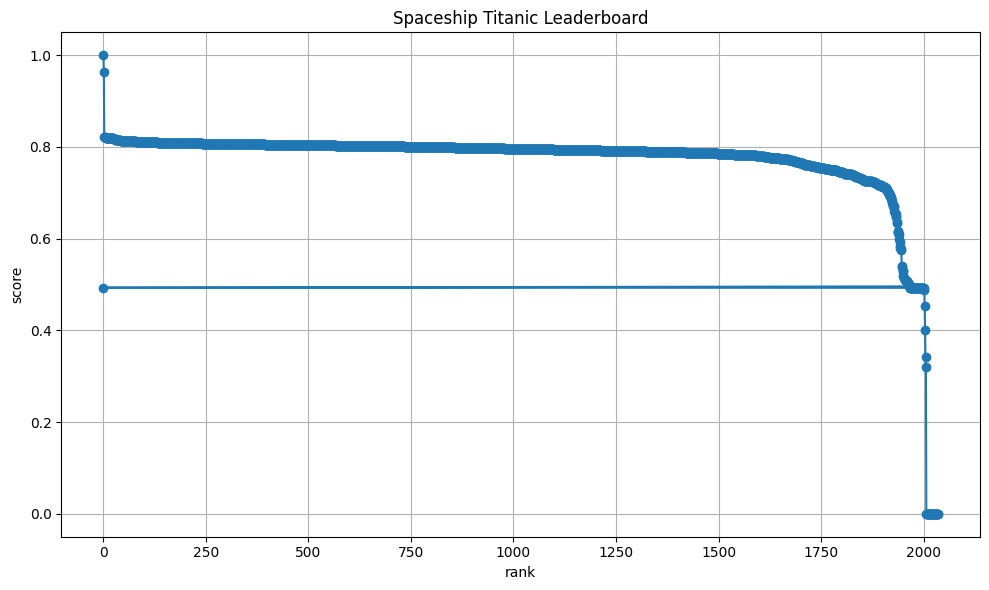

In [ ]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt

# ../outputs にある CSV を探す
csv_list = glob.glob('../outputs/leaderboard/*.csv')
if not csv_list:
    raise FileNotFoundError('`../outputs` に CSV が見つかりません')
csv_path = csv_list[0]
print(f'▶ 読み込むファイル: {csv_path}')

# DataFrame 化
df = pd.read_csv(csv_path)

# 列名を小文字＆アンダーバー形式に整形
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_', regex=False)
)

# プロット
plt.figure(figsize=(10,6))
plt.plot(df['rank'], df['score'], marker='o', linestyle='-')
plt.xlabel('rank')
plt.ylabel('score')
plt.title('Spaceship Titanic Leaderboard')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
from IPython.display import display

# 1) 0.05刻みの bin を作成
min_score = df['score'].min()
max_score = df['score'].max()
# 下限を 0.05 の倍数に切り下げ、上限を切り上げ
lower = np.floor(min_score * 20) / 20
upper = np.ceil(max_score * 20) / 20
bins = np.arange(lower, upper + 0.05, 0.05)

# bin のラベルを作成
labels = [f'{bins[i]:.2f}～{bins[i+1]:.2f}' for i in range(len(bins) - 1)]

# 2) pd.cut でスコアを bin 分け
df['score_bin'] = pd.cut(df['score'], bins=bins, labels=labels, right=False)

# 3) 分布を集計し、DataFrame 化
dist = df['score_bin'].value_counts().sort_index()
dist_df = dist.rename_axis('スコア範囲').reset_index(name='人数')

# 4) 表示
display(dist_df)


,スコア範囲,人数
0,0.00～0.05,30
1,0.05～0.10,0
2,0.10～0.15,0
3,0.15～0.20,0
4,0.20～0.25,0
5,0.25～0.30,0
6,0.30～0.35,2
7,0.35～0.40,0
8,0.40～0.45,1
9,0.45～0.50,40


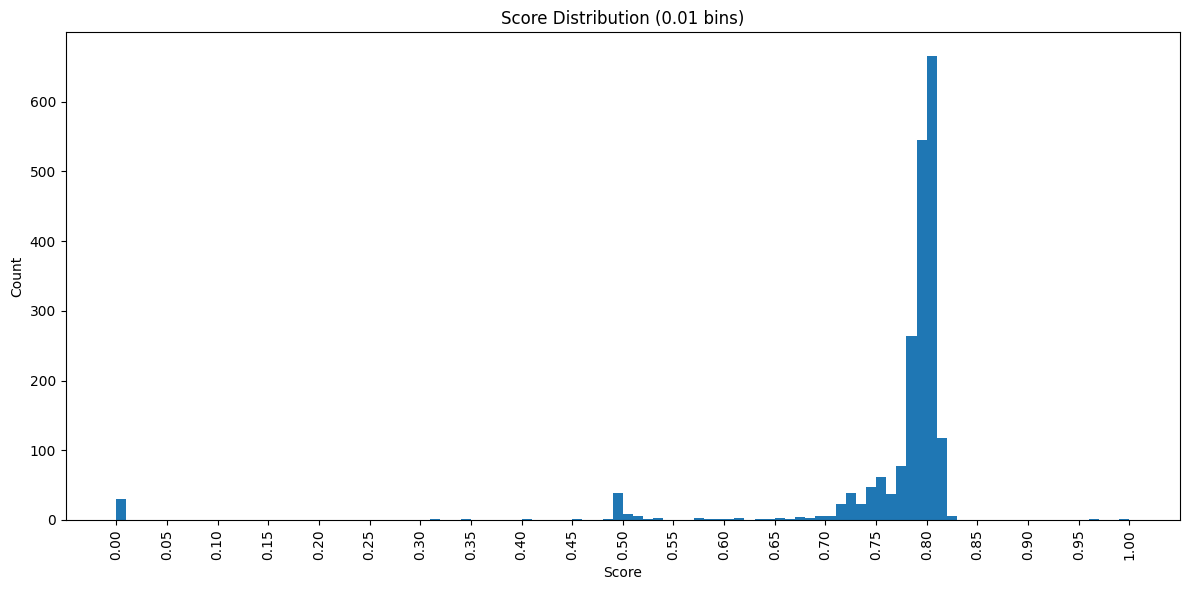

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# df は既に 'score' 列を含む DataFrame として読み込まれている前提

# 1) 0.01 刻みのビンを作成
min_score = df['score'].min()
max_score = df['score'].max()
lower = np.floor(min_score * 100) / 100
upper = np.ceil(max_score * 100) / 100
bin_edges = np.arange(lower, upper + 0.01, 0.01)

# 2) ヒストグラムを計算
counts, edges = np.histogram(df['score'], bins=bin_edges)

# 3) ビンの中心を計算
centers = edges[:-1] + np.diff(edges) / 2

# 4) 棒グラフを作成
plt.figure(figsize=(12, 6))
plt.bar(centers, counts, width=0.01)
plt.xlabel('Score')   # 英語ラベル
plt.ylabel('Count')   # 英語ラベル
plt.title('Score Distribution (0.01 bins)')

# 5) x軸の目盛を 0.05 刻みで表示（見やすく）
tick_positions = np.arange(lower, upper + 0.05, 0.05)
plt.xticks(tick_positions, rotation=90)

plt.tight_layout()
plt.show()
